In [1]:
# Boeing 747
# Linearized longitudinal equations of motion for Boeing 747
# in cruise condition at a nominal speed of 830ft/s at 20,000ft
# with a weight og 637,000lb

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.linalg import solve_continuous_are, solve_discrete_are

h = 0.01

# state variables: (u, w, q, theta, h)
# input variable: elevator deflection
Ac = np.array([[ -0.00643,   0.0263,    0,     -32.2, 0],
               [ -0.0941 ,  -0.624,   820,       0,   0],
               [ -0.000222, -0.00153,  -0.668,   0,   0],
               [  0,         0,         1,       0,   0],
               [  0,        -1,         0,     830,   0]])
Bc = np.array([[  0   ],
               [-32.7 ],
               [ -2.08],
               [  0   ],
               [  0   ]])
Cc = np.array([[  0, 0, 0, 0, 1]])
Dc = np.zeros((1,1))
m = Cc.shape[0]
p = Dc.shape[1]

sysC = signal.lti(Ac,Bc,Cc,Dc)
sysD = sysC.to_discrete(dt=0.01, method='zoh')

A = sysD.A
B = sysD.B
C = sysD.C
D = sysD.D

In [4]:
A

array([[ 9.9994e-01,  2.6218e-04, -5.3274e-04, -3.2199e-01,  0.0000e+00],
       [-9.4708e-04,  9.9372e-01,  8.1470e+00,  1.5216e-04,  0.0000e+00],
       [-2.2053e-06, -1.5201e-05,  9.9328e-01,  3.5584e-07,  0.0000e+00],
       [-1.1051e-08, -7.6172e-08,  9.9665e-03,  1.0000e+00, -0.0000e+00],
       [ 4.6947e-06, -9.9689e-03,  5.8389e-04,  8.3000e+00,  1.0000e+00]])

T=50, K=[[ 9.6819e-04  3.4655e-02  1.5530e+00 -2.3440e+01 -5.2630e-01]]
T=100, K=[[ 1.1996e-02 -4.4039e-01  1.3864e+01  4.3149e+02  8.9473e-01]]
T=150, K=[[ 1.2236e-02 -4.5303e-01  1.4124e+01  4.4330e+02  9.2715e-01]]
T=200, K=[[ 1.2238e-02 -4.5310e-01  1.4127e+01  4.4337e+02  9.2717e-01]]
T=250, K=[[ 1.2238e-02 -4.5310e-01  1.4127e+01  4.4337e+02  9.2718e-01]]
T=300, K=[[ 1.2238e-02 -4.5310e-01  1.4127e+01  4.4337e+02  9.2718e-01]]
T=inf, K=[[ 1.2238e-02 -4.5310e-01  1.4127e+01  4.4337e+02  9.2718e-01]]


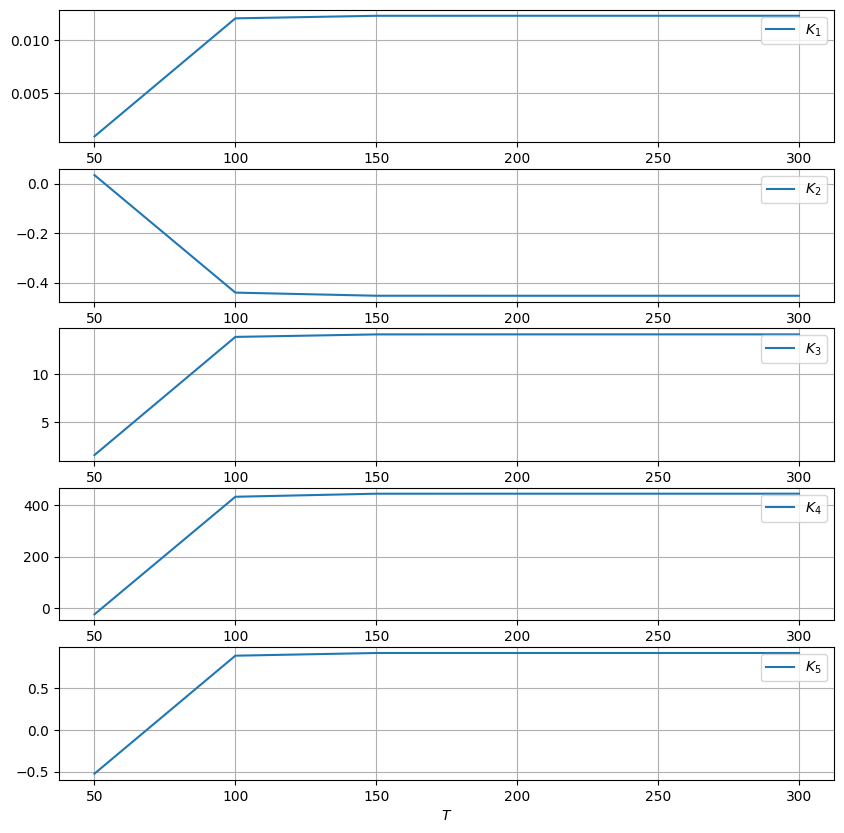

In [2]:
x0 = np.array([0, 0, 0, 0, 1])

Q = C.T@C
R = np.eye(1)
P = Q

T_list = [50,100,150,200,250,300]
K_list = []
for T in T_list:
  P = Q
  for t in range(T):
    # 3-10
    P = Q + A.T@P@A - A.T@P@B@np.linalg.inv(R+B.T@P@B)@B.T@P@A
  K = -np.linalg.inv(R+B.T@P@B)@B.T@P@A
  K_list.append(K)

np.set_printoptions(precision=4)
for i in range(len(T_list)):
  print(f'T={T_list[i]}, K={K_list[i]}')

P_inf = solve_discrete_are(A,B,Q,R)
K_inf = -np.linalg.inv(R+B.T@P_inf@B)@B.T@P_inf@A
print(f'T=inf, K={K_inf}')

K_list_ = np.array([x[0]  for x in K_list])

plt.figure(figsize=(10,10), dpi=100)
for i in range(5):
  plt.subplot(5,1,i+1)
  plt.plot(T_list,K_list_[:,i], label=f'$K_{i+1}$')
  plt.legend()
  plt.grid()
plt.xlabel(r'$T$')
plt.show()

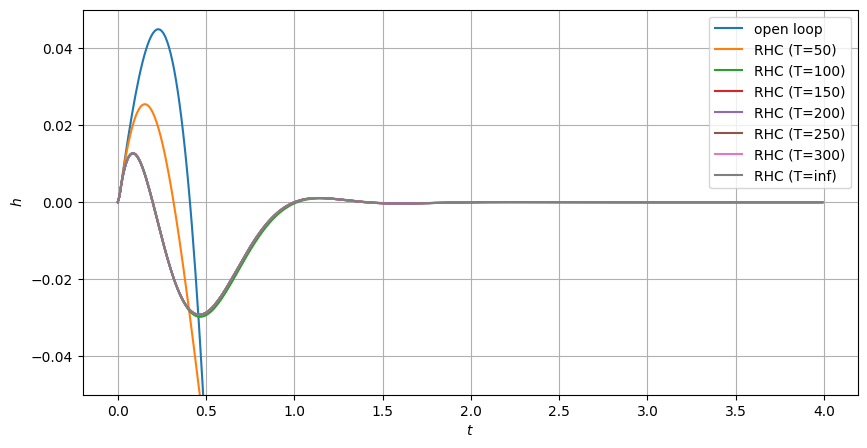

In [3]:
t, yo = signal.dimpulse(sysD, t=np.arange(0,4,0.01))
plt.figure(figsize=(10,5), dpi=100)
plt.plot(t,[x[0] for x in yo[0]], label='open loop')

for i in range(len(K_list)):
  K = K_list[i]
  sysDc = signal.dlti(A+B@K, B, C, D, dt=0.01)
  t, yc = signal.dimpulse(sysDc, t=np.arange(0,4,0.01))
  plt.plot(t,[x[0] for x in yc[0]], label=f'RHC (T={T_list[i]})')
sysDc = signal.dlti(A+B@K_inf, B, C, D, dt=0.01)
t, yc = signal.dimpulse(sysDc, t=np.arange(0,4,0.01))
plt.plot(t,[x[0] for x in yc[0]], label=f'RHC (T=inf)')

plt.grid()
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$h$')
plt.ylim(-0.05,0.05)
plt.show()